# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [1]:

print("Hello World!")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Hello World!


In [2]:
def rename(name):
    if name =="male":
        return 0
    else:
        return 1

In [3]:
test = pd.read_csv("data/test.csv")
tit_data = pd.read_csv("data/train.csv",converters={'Sex':rename})
tit_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [4]:
tit_data.drop('Name', axis=1, inplace=True)
tit_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S


| Column     | Description                                       | Values / Notes                                |
|------------|---------------------------------------------------|-----------------------------------------------|
| survival   | Survival                                          | 0 = No, 1 = Yes                                |
| pclass     | Ticket class                                      | 1 = 1st, 2 = 2nd, 3 = 3rd                       |
| sex        | Sex                                               | male, female                                   |
| age        | Age in years                                      | Numerical                                      |
| sibsp      | # of siblings / spouses aboard the Titanic        | Numerical                                      |
| parch      | # of parents / children aboard the Titanic        | Numerical                                      |
| ticket     | Ticket number                                     | Alphanumeric                                   |
| fare       | Passenger fare                                    | Numerical (float)                              |
| cabin      | Cabin number                                      | Alphanumeric (may be missing)                  |
| embarked   | Port of Embarkation                               | C = Cherbourg, Q = Queenstown, S = Southampton |


In [5]:
tit_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S


In [6]:
tit_data.drop('Ticket', axis=1, inplace=True)
tit_data.drop('Cabin', axis=1, inplace=True)

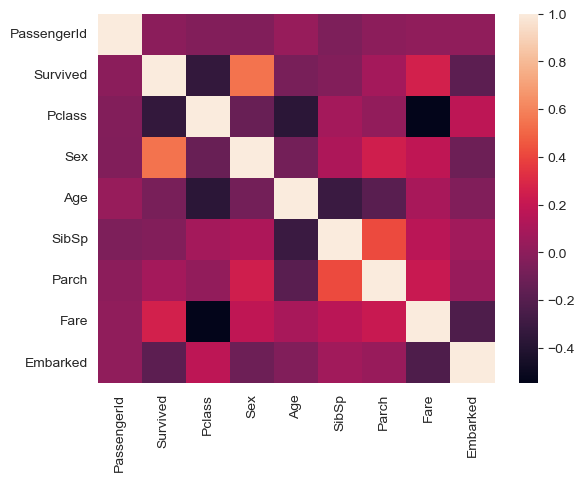

In [7]:
# First identify numeric and categorical columns
numeric_cols = tit_data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = tit_data.select_dtypes(include=['object', 'category']).columns

# Create copy of dataframe to avoid modifying original
train_encoded = tit_data.copy()

# Encode categorical columns
for col in categorical_cols:
    # Convert categories to codes (0, 1, 2, etc.)
    train_encoded[col] = train_encoded[col].astype('category').cat.codes

# Now create heatmap
sns.heatmap(train_encoded.corr())
plt.show()

In [8]:
tit_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [9]:
# from sklearn.model_selection import StratifiedShuffleSplit
# split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
# for train_indices ,test_indices = in split.split(tit_data , tit_data ['Survived',"Pclass","Sex"]):
#     strat_train_set = tit_data .loc[train_indices]
#     strat_test_set = tit_data .loc[train_indices]

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)

for train_indices, test_indices in split.split(tit_data, tit_data['Survived']):
    strat_train_set = tit_data.loc[train_indices]
    strat_test_set = tit_data.loc[test_indices]

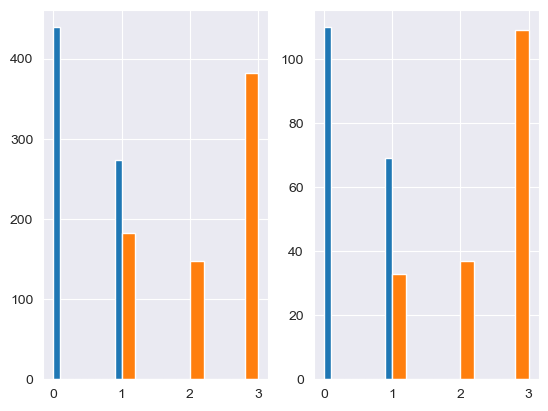

In [10]:
plt.subplot(1,2,1)
strat_train_set['Survived'].hist()
strat_train_set['Pclass'].hist()

plt.subplot(1,2,2)
strat_test_set['Survived'].hist()
strat_test_set['Pclass'].hist()

plt.show()

In [14]:
strat_train_set.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
444,445,1,3,0,NaN,0,0,8.1125,S
429,430,1,3,0,32.0,0,0,8.0500,S
558,559,1,1,1,39.0,1,1,79.6500,S
552,553,0,3,0,NaN,0,0,7.8292,Q
495,496,0,3,0,NaN,0,0,14.4583,C
